# Lecture Notes

<h2>The Core Components</h2>

**Text analytics is about collecting data, using machine learning to analyze it, and then visualizing the results to increase comprehension and identify trends.**
Artificial intelligence is the modern counter-part to the old printing press: allowing humans to interact with written language in a new digital environment. We don’t need to produce more writing, but we do need to understand more documents than we could ever possibly read. Text analytics is a part of natural language processing, the sub-field of AI that deals with language. Just like a printing press, however, text analytics isn’t just a single black-box mechanism. It has core components that work together but can be studied individually.

Text analytics first needs **data** to work with, then it needs machine learning to imitate human abilities, and finally it needs the visualization of results to tell a meaningful story. Each step is independent of the others, with its own problems and techniques. A printing press requires input paper (like data), ink and type (the central core, like machine learning), and a means for distributing books so that humans can actually benefit from them (like visualization). If we take this analogy with a printing press further, we need to create an automated factory for text analytics: a consistent process from data collection to visualization that we can repeat over and over again. This process is called a **pipeline**.

We automate the process of analyzing documents so that we can work with increasingly large datasets. Just like a factory line, every step we take should be broken down and precisely defined. In this case, every step must be coded with no human intervention along the way.

* A pipeline takes us from data collection to visualization. For example, we will look at a case-study that maps population characteristics using social media data. Because this pipeline is connected to a continuous source of data (Twitter), we can continue the analysis indefinitely. The possibility of streaming analytics lets us observe trends and changing social characteristics over time.

* The first type of core model we will learn about is text classification. Here we as humans decide the categories that we want to analyze. For example, I decide that I want to categorize news articles as about corruption or not about corruption. If necessary, these categories are manually labelled for a small number of documents. But I myself determine what categories we will analyze. Then we train a classifier to reproduce this labelling so that we can use it to automate our analysis. This is a form of supervised learning: training a classifier means that we teach it using examples from each category. For example, we will work on a case-study from tourism and marketing in which we train a classifier to predict attributes of hotel reviews. But we start by telling AI that hotels can be good, ok, or amazing. In other words, we supervise how the machine learns about hotels by telling it to distinguish between these specific categories.

* The second type of core model is text similarity. Here we step back and let AI decide which pieces of language are the most similar: documents, authors, words. Let’s say I want to learn about the populations of different cities: what entertainment do people prefer, what food do they eat, what sports do they watch? Our case-study on population mapping uses document clustering to find similarities between cities using tweets. We as humans decide what data to use (Twitter) and which cities to include (ten from around the world). But then we let AI categorize the cities themselves, choosing which attributes are important for defining each one. This is a form of unsupervised learning. It is unsupervised because we don’t tell the machine that we care about entertainment or food or sports. We only tell the machine to find the differences between cities.

* Text analytics can be applied to very large datasets. The main motivation is that we have too many documents to work them all individually. So we use visualization at the end of our pipeline to quickly understand what the results mean. We also need to use statistical testing to figure out when a pattern is meaningful and when it isn’t. Researchers often use statistical tests alone, skipping visualization because we know the models so well. But visualization helps us tell a story about what we’ve learned using text analytics.

# Colab Setup

In [1]:
# if you are running these labs in CoLab, you will first need to mount the drive and 
# copy text_analitics.py to path 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
###Add text_analytics.py to path 
!cp "/content/drive/My Drive/Colab Notebooks/CourseWork/Text Analytics and Natural Language Processing/text_analytics.py" .
print("Done!")

Done!


# Lecture Lab

Welcome to our second lab!

In this lab, we're going to load another data set, and then we'll do some descriptive statistics to find out about the data we're looking at. Let's start by loading our dependencies into the environment.

In [5]:
from text_analytics import text_analytics
import os
import pandas as pd

ai = text_analytics()

# Pandas formating 
# inclears number of columns to display in line and column with for easier reading 
pd.set_option("display.max_columns", 10)
pd.set_option('display.width', 500)

print("Done!")

Done!


Now, let's load another data set. This time, we'll work with books from the 19th century, courtesy of Project Gutenberg. So the filename is "Gutenberg.1850.Authors.gz" and it contains books that have been cleaned and split into smaller pieces. We'll use these later to study authorship and style.

In [6]:
file = os.path.join(ai.data_dir, "Gutenberg.1850.Authors.gz")
df = pd.read_csv(file, index_col = 0)
print(df)
print("Done!")

        index  Generation    Author                Title                                               Text
0         150        1850  abbott_j  alexander_the_great  note project gutenberg also has an html versio...
1         151        1850  abbott_j  alexander_the_great  it will be recollected to epirus where her fri...
2         152        1850  abbott_j  alexander_the_great  it would be best to endeavor to effect a landi...
3         153        1850  abbott_j  alexander_the_great  transport his army across the straits the army...
4         154        1850  abbott_j  alexander_the_great  that the true greatness of the soul of alexand...
...       ...         ...       ...                  ...                                                ...
17042  125483        1850    wood_h       victor_serenus  since i have been with amabel it hath waxed st...
17043  125484        1850    wood_h       victor_serenus  his face uttered a loud cry and shrank back af...
17044  125485        1850   

Now, we're going to find out how many samples we have from different authors. So, the code below tells us how many rows in this table are representing each of our authors.

In [7]:
frequencies = ai.print_labels(df, "Author")
print("Done!")

abbott_j 927
altsheler_j 610
bennett_a 573
bindloss_h 815
chambers_r 728
collingwood_h 659
collins_w 858
crawford_f 912
doyle_a 694
galsworthy_j 337
gissing_g 528
haggard_h 956
hume_f 975
london_j 590
meade_l 701
oppenheim_e 848
parker_g 429
quiller-couch_a 514
stratemeyer_e 792
ward_h 671
warner_c 300
wells_c 515
weyman_s 511
wood_h 556
Done!


Now, each *sample* is a chapter-size chunk of about 5,000 words. So these authors all wrote a lot of books, and the books all have a bunch of samples. Let's make a figure to visualize this. The first step is to make a dataframe that contains our frequencies. To do this, run the code below.

In [8]:
counts = pd.DataFrame.from_dict(frequencies, orient = "index", columns = ["Frequency"])
print(counts)
print("Done!")

                 Frequency
abbott_j               927
altsheler_j            610
bennett_a              573
bindloss_h             815
chambers_r             728
collingwood_h          659
collins_w              858
crawford_f             912
doyle_a                694
galsworthy_j           337
gissing_g              528
haggard_h              956
hume_f                 975
london_j               590
meade_l                701
oppenheim_e            848
parker_g               429
quiller-couch_a        514
stratemeyer_e          792
ward_h                 671
warner_c               300
wells_c                515
weyman_s               511
wood_h                 556
Done!


Now we just use the built-in plotting function from *pandas*

Done!


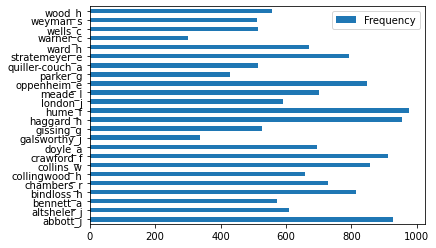

In [9]:
counts.plot(kind = "barh")
print("Done!")

And that's it! Now we've opened another data set, gotten some basic information about it, and made a simple graph to show us who is the most prolific author!

Now it's your turn. Try to use the code above to explore a different data set:

    "Gutenberg.1800.Authors.gz"

In [10]:
file = os.path.join(ai.data_dir, "Gutenberg.1800.Authors.gz")
df = pd.read_csv(file, index_col = 0)
print(df)
print("Done!")

         index  Generation   Author                        Title                                               Text
2082      2082        1800  alger_h           adrift_in_new_york  note project gutenberg also has an html versio...
2083      2083        1800  alger_h           adrift_in_new_york  after a brief pause florence seated herself at...
2084      2084        1800  alger_h           adrift_in_new_york  turned and fixed a last sad look on the house ...
2085      2085        1800  alger_h           adrift_in_new_york  attired young lady seated on the sofa yes leig...
2086      2086        1800  alger_h           adrift_in_new_york  a cousin that will like you too a young girl n...
...        ...         ...      ...                          ...                                                ...
103308  103308        1800  yonge_c  young_folks_history_of_rome  free from all suspicion and this of course did...
103309  103309        1800  yonge_c  young_folks_history_of_rome  the pu

In [11]:
frequencies = ai.print_labels(df, "Author")
print("Done!")

alger_h 925
ballantyne_r 1120
baring-gould_s 982
darwin_c 858
dickens_c 1273
ebers_g 975
henty_g 2141
howells_w 809
james_h 830
kingston_w 1983
lever_c 1232
lytton_e 765
macdonald_g 1066
marryat_f 850
meredith_g 491
motley_j 335
oliphant_m 1322
reid_m 1016
stevenson_r 1088
sue_e 657
thackeray_w 771
trollope_a 1971
twain_m 696
yonge_c 1384
Done!


In [12]:
counts = pd.DataFrame.from_dict(frequencies, orient = "index", columns = ["Frequency"])
print(counts)
print("Done!")

                Frequency
alger_h               925
ballantyne_r         1120
baring-gould_s        982
darwin_c              858
dickens_c            1273
ebers_g               975
henty_g              2141
howells_w             809
james_h               830
kingston_w           1983
lever_c              1232
lytton_e              765
macdonald_g          1066
marryat_f             850
meredith_g            491
motley_j              335
oliphant_m           1322
reid_m               1016
stevenson_r          1088
sue_e                 657
thackeray_w           771
trollope_a           1971
twain_m               696
yonge_c              1384
Done!


Done!


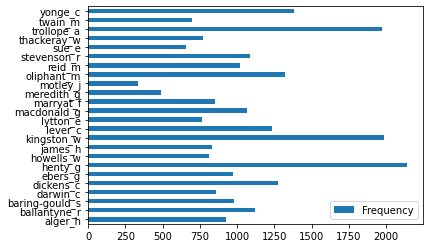

In [13]:
counts.plot(kind = "barh")
print("Done!")